# Méthode 1 : on remplace le rouge des pixels donnés par la fonction de position par le code ASCII du caractère

# Imports

In [1]:
from numpy import uint8
from numpy import unpackbits # conversion uint8 en binaire
# Exemple : 63 uint8 --unpackbits--> 00111111 en binaire
from numpy import packbits # conversion binaire en uint8
# Exemple :  00111111 en binaire --packbits--> 63 uint8

import matplotlib.pyplot as plt

# sudo pip3 install imageio
from imageio import imread # lire l'image en uint8
from imageio import imwrite # ecrire l'image dans un fichier

# Pour utiliser des fonctions d'autres fichiers jupyter
# sudo pip3 install ipynb
from ipynb.fs.full.mesFonctions import initialisation

# Initialisation

/home/damien/Bureau/Projet_TI/Donnees/
/home/damien/Bureau/Projet_TI/Resultats/
Type uint8
Dimensions image : n = 407 ; p = 362 ; z = 3


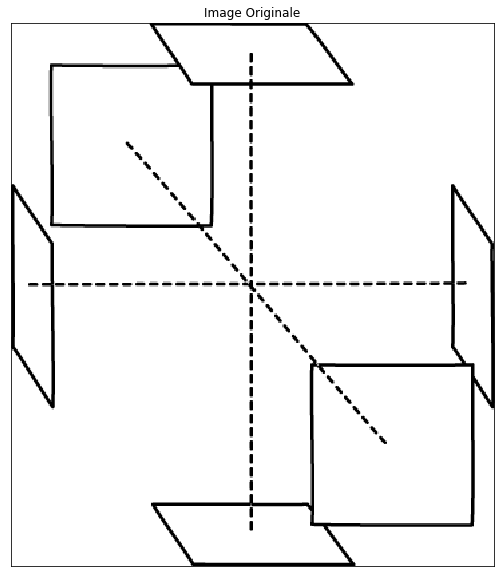

In [2]:
nomImage = "white.png"
[image,n,p,z,pathDonnees,pathResultats] = initialisation(nomImage)

# Choix du message

In [3]:
message = "Il fait beau aujourd'hui"
longueurMessage = len(message)

# Choix des fonctions de position

In [4]:
def fonctionHachageX(k):
    return 5*k+10
#enddef

def fonctionHachageY(k):
    return 2*k+20
#enddef

# Codage du message dans l'image

In [5]:
for k in range(0,longueurMessage,1):
    
    posX = fonctionHachageX(k)
    posY = fonctionHachageY(k)
    
    if ((posX<n) & (posY<p)):    
        codeAscii=uint8(ord(message[k]))
        image[posX,posY,0]=codeAscii
    else:
        raise Exception("Le message sort de l'image")
#endfor   

# Sauvegarde de l'image

In [6]:
nomImageAvecMessage = "resultatMethode1.png"
imwrite(pathResultats+nomImageAvecMessage, image)

# Destruction de la variable $ message $
## (on considère qu'on ne connait pas le message)

In [7]:
message=[]

# Image avec message

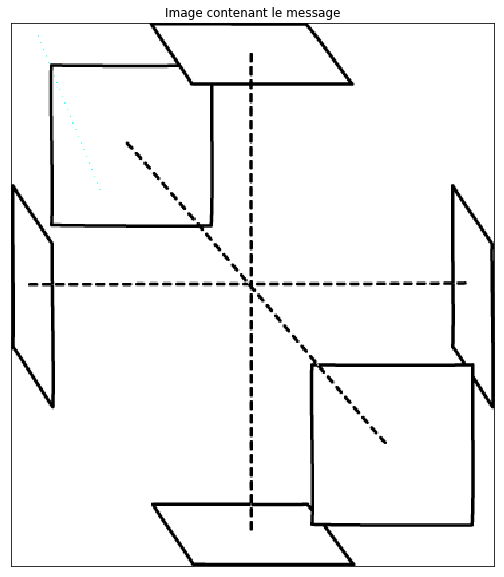

In [8]:
try:
    imageAvecMessage = imread(pathResultats+nomImageAvecMessage)

    plt.figure(figsize = (50,10))
    plt.imshow(imageAvecMessage)
    plt.title('Image contenant le message'), plt.xticks([]), plt.yticks([])
    plt.show()
except IOError:
    raise IOError("Le fichier "+pathResultats+nomImageAvecMessage+" est introuvable")

# Extraction du message dans l'image

In [9]:
message=""

for k in range(0,longueurMessage,1):
    posX = fonctionHachageX(k)
    posY = fonctionHachageY(k)
    
    message=message+chr(imageAvecMessage[posX,posY,0])
#endfor

print(message)

Il fait beau aujourd'hui
